### Dados

In [1]:
train_path = 'avi_lic_train.txt'
f = open(train_path, mode='r', encoding='utf-8').read().splitlines()
f[:20]

['AVISO X X O',
 'DE X X O',
 'LICITAÇÃO X X O',
 'PREGÃO X X B-MODALIDADE_LICITACAO',
 'ELETRÔNICO X X I-MODALIDADE_LICITACAO',
 'Nº X X O',
 '01 X X B-NUM_LICITACAO',
 '2021 X X I-NUM_LICITACAO',
 'Processo X X O',
 '00052 X X B-PROCESSO',
 '00021170 X X I-PROCESSO',
 '2020 X X I-PROCESSO',
 '47 X X I-PROCESSO',
 'OBJETO X X O',
 'Contratação X X B-OBJ_LICITACAO',
 'de X X I-OBJ_LICITACAO',
 'Concessionária X X I-OBJ_LICITACAO',
 'Autorizada X X I-OBJ_LICITACAO',
 'pela X X I-OBJ_LICITACAO',
 'Montadora X X I-OBJ_LICITACAO']

## Pré-processamento dos dados

### Passo 1: Separando as palavras e as classes

In [2]:
def preprocess(ner_set):
    sentences = []
    tags = []

    temp_sentence = []
    temp_tag = []
    for line in ner_set:
        try:
            word, _, _, tag = line.split()
            temp_sentence.append(word)
            temp_tag.append(tag)
        except:
            sentences.append(temp_sentence)
            tags.append(temp_tag)
            temp_sentence = []
            temp_tag = []

    if temp_sentence:
        sentences.append(temp_sentence)
        tags.append(temp_tag)
    return sentences, tags

In [3]:
train_x, train_y = preprocess(open('avi_lic_train.txt', mode='r', encoding='utf-8'))
valid_x, valid_y = preprocess(open('avi_lic_testa.txt', mode='r', encoding='utf-8'))
test_x, test_y = preprocess(open('avi_lic_testb.txt', mode='r', encoding='utf-8'))

In [4]:
len(train_x), len(train_y), len(valid_x), len(valid_y), len(test_x), len(test_y)

(163, 163, 35, 35, 36, 36)

In [5]:
print(' '.join(train_x[0]))
print()
print(' '.join(train_y[0]))

AVISO DE LICITAÇÃO PREGÃO ELETRÔNICO Nº 01 2021 Processo 00052 00021170 2020 47 OBJETO Contratação de Concessionária Autorizada pela Montadora RENA ULT localizada no Distrito Federal para prestação de serviços de forma contínua durante o período de garantia para as manutenções preventivas e corretivas com fomecimento e aplicação de peças e acessórios genuínos lubrificantes óleos aditivos higienizadores alinhamento e balanceamento para 40 quarenta viaturas marca RENAULT modelo Importado Logan ZEN 16MT anos modelos 2020 2021 1 6 flex gasolina álcool pertencentes à frota da Polícia Civil do Distrito Federal conforme especificações e condições estabelecidas no termo de referência constante do Anexo I do Edital TIPO Menor Preço Valor estimado da licitação R 826 897 20 oitocentos e vinte e seis mil oitocentos e noventa e sete reais e vinte centavos Natureza de Despesa 33 90 30 e 33 90 39 Fonte 100 Programa de Trabalho 28 845 0903 00NR 0053 Manutenção da Polícia Civil do Distrito Federal Unid

### Passo 2: Criando os dicionários de palavras e classes (utilizando o conjunto de treinamento)

Incluindo os tokens especiais \<UNK\>, \<BOS\>, \<EOS\> de palavras e \<PAD\> para classes

In [6]:
from collections import OrderedDict

def word_dict(sentences):
    word2idx = OrderedDict({'<UNK>': 0, '<PAD>': 1, '<BOS>': 2, '<EOS>': 3})
    for sentence in sentences:
        for word in sentence:
            if word not in word2idx:
                word2idx[word] = len(word2idx)
    return word2idx

def tag_dict(tag_sentences):
    tag2idx = OrderedDict({'<PAD>': 0})
    for tags in tag_sentences:
        for tag in tags:
            if tag not in tag2idx:
                tag2idx[tag] = len(tag2idx)
    return tag2idx

word2idx = word_dict(train_x)
tag2idx  = tag_dict(train_y)

In [7]:
tag2idx

OrderedDict([('<PAD>', 0),
             ('O', 1),
             ('B-MODALIDADE_LICITACAO', 2),
             ('I-MODALIDADE_LICITACAO', 3),
             ('B-NUM_LICITACAO', 4),
             ('I-NUM_LICITACAO', 5),
             ('B-PROCESSO', 6),
             ('I-PROCESSO', 7),
             ('B-OBJ_LICITACAO', 8),
             ('I-OBJ_LICITACAO', 9),
             ('B-VALOR_ESTIMADO', 10),
             ('I-VALOR_ESTIMADO', 11),
             ('B-CODIGO_SISTEMA_COMPRAS', 12),
             ('B-SISTEMA_COMPRAS', 13),
             ('I-SISTEMA_COMPRAS', 14),
             ('B-DATA_ABERTURA', 15),
             ('I-DATA_ABERTURA', 16),
             ('B-TIPO_OBJ', 17),
             ('I-TIPO_OBJ', 18),
             ('B-ORGAO_LICITANTE', 19),
             ('I-ORGAO_LICITANTE', 20),
             ('I-CODIGO_SISTEMA_COMPRAS', 21)])

In [8]:
for idx, word in enumerate(word2idx):
    print(word, word2idx[word])
    if idx >= 20:
        break

<UNK> 0
<PAD> 1
<BOS> 2
<EOS> 3
AVISO 4
DE 5
LICITAÇÃO 6
PREGÃO 7
ELETRÔNICO 8
Nº 9
01 10
2021 11
Processo 12
00052 13
00021170 14
2020 15
47 16
OBJETO 17
Contratação 18
de 19
Concessionária 20


### Passo 3: Substituir as palavras e classes pelos seus indices nos dicionarios criados

In [9]:
def numericalize(sentences, word2idx, tag_sentences, tag2idx):
    numericalized_sentences = [[word2idx['<UNK>'] if word not in word2idx else word2idx[word] for word in sentence] for sentence in sentences]
    numericalized_tags = [[tag2idx[tag] for tag in tags] for tags in tag_sentences]
    return numericalized_sentences, numericalized_tags

train_x, train_y = numericalize(train_x, word2idx, train_y, tag2idx)
valid_x, valid_y = numericalize(valid_x, word2idx, valid_y, tag2idx)
test_x, test_y = numericalize(test_x, word2idx, test_y, tag2idx)

train_x[0]

[4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 19,
 32,
 19,
 33,
 34,
 35,
 36,
 37,
 19,
 38,
 30,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 42,
 46,
 19,
 47,
 42,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 42,
 55,
 30,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 15,
 11,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 28,
 29,
 80,
 81,
 42,
 82,
 83,
 27,
 84,
 19,
 85,
 86,
 79,
 87,
 88,
 79,
 89,
 90,
 91,
 92,
 93,
 94,
 76,
 95,
 96,
 97,
 98,
 99,
 100,
 42,
 101,
 42,
 102,
 103,
 100,
 42,
 104,
 42,
 105,
 106,
 42,
 101,
 107,
 108,
 19,
 109,
 110,
 111,
 112,
 42,
 110,
 111,
 113,
 114,
 115,
 116,
 19,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 76,
 77,
 78,
 79,
 28,
 29,
 124,
 125,
 126,
 127,
 128,
 129,
 79,
 28,
 29,
 130,
 131,
 132,
 19,
 133,
 80,
 134,
 19,
 135,
 136,
 137,
 79,
 138,
 139,
 140,
 118,
 19,
 141,
 19,
 11,
 142,
 143,
 144,
 145,
 89,


### Passo 4: Adicionar tokens de inicio e final de sentenca

In [10]:
import itertools
import torch
def add_special_tokens(sentences, word2idx, tag_sentences, tag2idx):
    formatted_sentences = [torch.LongTensor([word for word in itertools.chain([word2idx['<BOS>']], sentence, [word2idx['<EOS>']])]) for sentence in sentences]
    formatted_tags = [torch.LongTensor([tag for tag in itertools.chain([tag2idx['O']], tags, [tag2idx['O']])]) for tags in tag_sentences]
    return formatted_sentences, formatted_tags

train_x, train_y = add_special_tokens(train_x, word2idx, train_y, tag2idx)
valid_x, valid_y = add_special_tokens(valid_x, word2idx, valid_y, tag2idx)
test_x, test_y   = add_special_tokens(test_x, word2idx, test_y, tag2idx)

train_x[0]

tensor([  2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
         31,  19,  32,  19,  33,  34,  35,  36,  37,  19,  38,  30,  39,  40,
         41,  42,  43,  44,  45,  42,  46,  19,  47,  42,  48,  49,  50,  51,
         52,  53,  54,  42,  55,  30,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  15,  11,  68,  69,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  28,  29,  80,  81,  42,  82,  83,  27,  84,  19,
         85,  86,  79,  87,  88,  79,  89,  90,  91,  92,  93,  94,  76,  95,
         96,  97,  98,  99, 100,  42, 101,  42, 102, 103, 100,  42, 104,  42,
        105, 106,  42, 101, 107, 108,  19, 109, 110, 111, 112,  42, 110, 111,
        113, 114, 115, 116,  19, 117, 118, 119, 120, 121, 122, 123,  76,  77,
         78,  79,  28,  29, 124, 125, 126, 127, 128, 129,  79,  28,  29, 130,
        131, 132,  19, 133,  80, 134,  19, 135, 136, 137,  79, 1

### Passo 5: Criar os mini-batches de treinamento

In [11]:
len(train_x), max([len(ato) for ato in train_x])

(163, 347)

In [12]:
import numpy as np

# Ordenando sentencas por tamanho (antes de criar os batches)
ordered_idx = np.argsort([len(train_x[i]) for i in range(len(train_x))])
train_x = [train_x[idx] for idx in ordered_idx]
train_y = [train_y[idx] for idx in ordered_idx]

In [13]:
from torch.nn.utils.rnn import pad_sequence

def create_batches(x, y, batch_size, pad_token, pad_class):
    batch_x = []
    batch_y = []
    mask = []

    # Separando os batches pelo tamanho de batch_size
    i = 0
    while i < len(x):
        batch_x.append(x[i:min(len(x), i+batch_size)])
        batch_y.append(y[i:min(len(y), i+batch_size)])
        i += batch_size
    
    # Realizando padding dos batches e criando mask para identificar padding durante o treinamento
    for i in range(len(batch_x)):
        batch_x[i] = pad_sequence(batch_x[i], batch_first = True, padding_value = pad_token)
        batch_y[i] = pad_sequence(batch_y[i], batch_first = True, padding_value = pad_class)
        mask.append(batch_x[i] != pad_token)

    return batch_x, batch_y, mask

train_x, train_y, mask = create_batches(train_x, train_y, batch_size=32, pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])
valid_x, _, valid_mask = create_batches(valid_x, valid_y, batch_size=len(valid_x), pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])
test_x, _, test_mask   = create_batches(test_x,  test_y,  batch_size=len(test_x),  pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])

In [14]:
train_x[0].shape, train_y[0].shape, mask[0].shape

(torch.Size([32, 105]), torch.Size([32, 105]), torch.Size([32, 105]))

In [15]:
train_x[0][0, :mask[0][0].sum()]

tensor([   2,    4,    5,    6,    7, 1370,  555, 1122, 1409,  497,  345,   19,
         548,   19,  549, 1043,  363,  453,  680,  143, 1409,  142,  296,  284,
        1683,   79,  287,  708,  289,   74,  710,  162, 1656,   19,  165,   42,
        2650, 1178,   79,  171,   87, 1246, 2082, 2868,   42,   27,  234,  154,
        1688,  159,  156,  157,  178,  523,   19,  724,   19, 1409, 2853,    5,
        2854,  766,  390,    3])

## Criando o modelo neural biLSTM-CRF

O modelo consiste em:



1.   Camada de embeddings (transforma indices das palavras em vetores numericos)
2.   Camada biLSTM para encode da informação (-> <-)
3.   Camada linear para reducao da dimensao do vetor de saida da camada biLSTM
3.   Camada CRF para classificação de cada token de entrada

In [16]:
from torchcrf import CRF

In [17]:
class bilstm_crf(torch.nn.Module):
    def __init__(self, word2idx, tag2idx):
        super(bilstm_crf, self).__init__()
        # Camada de embeddings
        self.embedding = torch.nn.Embedding(num_embeddings=len(word2idx), embedding_dim = 50, padding_idx = word2idx['<PAD>'])
        # Camada biLSTM
        self.bilstm = torch.nn.LSTM(input_size=50, hidden_size = 200, num_layers = 2, batch_first = True, bidirectional = True, dropout = 0.25)
        # Camada linear
        self.linear = torch.nn.Linear(400, len(tag2idx))
        # Camada CRF
        self.crf = CRF(num_tags = len(tag2idx), batch_first = True)

    def forward(self, x, y, mask):
        x = self.embedding(x)
        x, _ = self.bilstm(x)
        x = self.linear(x)
        loss = self.crf(x, y, mask=mask)
        return loss

    def decode(self, x, mask):
        x = self.embedding(x)
        x, _ = self.bilstm(x)
        x = self.linear(x)
        prediction = self.crf.decode(x, mask=mask)
        return prediction

In [18]:
model = bilstm_crf(word2idx = word2idx, tag2idx = tag2idx)
loss = model(train_x[0], train_y[0], mask[0])
prediction = model.decode(valid_x[0], valid_mask[0])

loss

tensor(-9315.2754, grad_fn=<SumBackward0>)

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

cpu


## Código para avaliação do modelo

Métrica span-based f1-score (f1-score a nível de entidades)

$f_1 = 2\frac{precision\times recall}{precision + recall}$

$precision = \frac{TP}{TP + FP}$

$recall = \frac{TP}{TP + FN}$

In [20]:
from seqeval.metrics import f1_score
from seqeval.scheme import IOB1

In [21]:
idx2tag = {idx: tag for tag, idx in tag2idx.items()}

def IOBify(tags_sequence, idx2tag):
    if isinstance(tags_sequence[0], list):
        iob_y = [[idx2tag[tag] for tag in tags] for tags in tags_sequence]
    else:
        iob_y = [[idx2tag[tag.item()] for tag in tags] for tags in tags_sequence]
    return iob_y

y_true = IOBify(valid_y, idx2tag)
y_pred = IOBify(prediction, idx2tag)

In [22]:
f1_score(y_true, y_pred)

e:\Git\GitHub\experiments\members\ian\ian\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: <PAD> seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


0.002680965147453083

## Código para treinamento do modelo

In [23]:
lrate = 0.015
optim = torch.optim.SGD(model.parameters(), lr=lrate, momentum=0.9)

In [24]:
f1_history = []
mean_loss_history = []

# Alterar numero de epocas de treinamento (~30-50 epocas para modelo bem treinado)
for epoch in range(100):
    mean_loss = 0.0
    model.train()
    # Iniciando uma epoch de treinamento supervisionado
    for batch in range(len(train_x)):
        x = train_x[batch].to(device)
        y = train_y[batch].to(device)
        m = mask[batch].to(device)
        optim.zero_grad()
        loss = -model(x, y, m)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)
        optim.step()
        mean_loss += loss
    mean_loss /= len(train_x)
    mean_loss_history.append(mean_loss)

    model.eval()
    # Calculo do desempenho do modelo treinado nesta epoch
    y_pred = model.decode(valid_x[0].to(device), valid_mask[0].to(device))
    y_pred = IOBify(y_pred, idx2tag)
    y_true = IOBify(valid_y, idx2tag)
    f1 = f1_score(y_true, y_pred)
    f1_history.append(f1)

    print(f'Epoch: {epoch} | Loss media: {mean_loss} | f1-score: {f1}')

Epoch: 0 | Loss media: 10893.1279296875 | f1-score: 0.0
Epoch: 1 | Loss media: 5137.67041015625 | f1-score: 0.0
Epoch: 2 | Loss media: 4122.6474609375 | f1-score: 0.0
Epoch: 3 | Loss media: 4198.5068359375 | f1-score: 0.0
Epoch: 4 | Loss media: 3216.703369140625 | f1-score: 0.0
Epoch: 5 | Loss media: 3024.0361328125 | f1-score: 0.0
Epoch: 6 | Loss media: 3166.7216796875 | f1-score: 0.0
Epoch: 7 | Loss media: 2716.830078125 | f1-score: 0.0
Epoch: 8 | Loss media: 2402.154052734375 | f1-score: 0.0
Epoch: 9 | Loss media: 2242.1494140625 | f1-score: 0.0
Epoch: 10 | Loss media: 2070.036865234375 | f1-score: 0.0
Epoch: 11 | Loss media: 1926.1700439453125 | f1-score: 0.015625
Epoch: 12 | Loss media: 1761.24560546875 | f1-score: 0.0
Epoch: 13 | Loss media: 1728.4588623046875 | f1-score: 0.07317073170731707
Epoch: 14 | Loss media: 1612.4495849609375 | f1-score: 0.07228915662650602
Epoch: 15 | Loss media: 1519.3876953125 | f1-score: 0.08032128514056225
Epoch: 16 | Loss media: 1462.5703125 | f1-sc

In [25]:
mean_loss_history_ = [mean_loss.item() for mean_loss in mean_loss_history]

[Text(0.5, 0, 'epochs'), Text(0, 0.5, 'mean loss')]

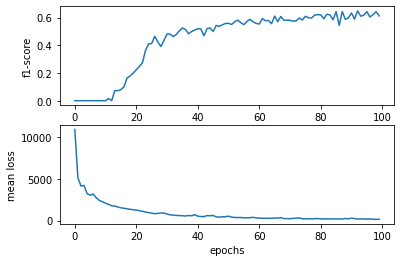

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(f1_history)
axs[1].plot(mean_loss_history_)
axs[0].set(ylabel='f1-score')
axs[1].set(xlabel='epochs', ylabel='mean loss')

## Utilização do modelo treinado para predição em novos dados e interface com usuário

Passos:


1.   Transformar as palavras do texto em indices utilizando o dicionario word2idx e converter para tensor
2.   Realizar as predições
3.   Realizar extração das entidades de acordo com as predições

### Passo 1: Transformar as palavras em indices utilizando word2idx

In [33]:
text = '<BOS> AVISO DE LICITAÇÃO PREGÃO ELETRÔNICO Nº 18/2022 - UASG 974002 A Pregoeira comunica aos interessados que a fim de atender a demanda do Jardim Botânico e Brasília - JBB, a Subsecretaria de Compras Governamentais - SCG/SPLAN/SEEC operacionalizará licitação do PE nº 18/2022 no sistema Comprasnet, cujo objeto é a aquisição de bomba com vazão, bomba hidráulica, motobomba, bloco de cimento, cimento, relê, disjuntor, mini contactor, etc, conforme especificações e condições estabelecidas no termo de referência constante do Anexo I do Edital. Valor total estimado: R$ 46.237,77. Tipo de Licitação: Menor Preço. Unidade Orçamentária: 150106; Programa de Trabalho: 18.122.8210.8517.9658. Elemento de despesa: 33.90.30 e 44.90.52. Fonte: 100 e 120. Abertura das propostas dia 21/02/2022, às 9h30min. Processo 00195-00000275/2021-73. O edital poderá ser retirado no endereço eletrônico: www.comprasgovernamentais.gov.br. Informações pelo e-mail: pregoeirosulog08@economia.df.gov.br Brasília/DF, 04 de fevereiro de 2022 RITA DE CÁSSIA GODINHO DE CAMPOS <EOS>'.split()
print(' '.join(text))

<BOS> AVISO DE LICITAÇÃO PREGÃO ELETRÔNICO Nº 18/2022 - UASG 974002 A Pregoeira comunica aos interessados que a fim de atender a demanda do Jardim Botânico e Brasília - JBB, a Subsecretaria de Compras Governamentais - SCG/SPLAN/SEEC operacionalizará licitação do PE nº 18/2022 no sistema Comprasnet, cujo objeto é a aquisição de bomba com vazão, bomba hidráulica, motobomba, bloco de cimento, cimento, relê, disjuntor, mini contactor, etc, conforme especificações e condições estabelecidas no termo de referência constante do Anexo I do Edital. Valor total estimado: R$ 46.237,77. Tipo de Licitação: Menor Preço. Unidade Orçamentária: 150106; Programa de Trabalho: 18.122.8210.8517.9658. Elemento de despesa: 33.90.30 e 44.90.52. Fonte: 100 e 120. Abertura das propostas dia 21/02/2022, às 9h30min. Processo 00195-00000275/2021-73. O edital poderá ser retirado no endereço eletrônico: www.comprasgovernamentais.gov.br. Informações pelo e-mail: pregoeirosulog08@economia.df.gov.br Brasília/DF, 04 de f

In [34]:
num_text = torch.LongTensor([word2idx['<UNK>'] if word not in word2idx else word2idx[word] for word in text]).unsqueeze(dim=0)
mask = num_text != -1
num_text.shape, mask.shape

(torch.Size([1, 144]), torch.Size([1, 144]))

### Passo 2: Realizar predições

In [35]:
model = model.to('cpu')

In [36]:
y_pred = model.decode(num_text, mask)
y_pred = IOBify(y_pred, idx2tag)
for idx, (word, tag) in enumerate(zip(text, y_pred[0])):
    print(word, tag)
    if idx >= 20:
        break

<BOS> O
AVISO O
DE O
LICITAÇÃO O
PREGÃO B-MODALIDADE_LICITACAO
ELETRÔNICO I-MODALIDADE_LICITACAO
Nº O
18/2022 B-NUM_LICITACAO
- I-NUM_LICITACAO
UASG O
974002 O
A O
Pregoeira O
comunica O
aos O
interessados O
que O
a O
fim O
de O
atender O


### Passo 3: Realizar extração das entidades de acordo com as predições

In [37]:
def extract_entities(y_pred, text):
    inside_entity = False
    entity_type = ''
    entity = ''
    entities = []
    for word, tag in zip(text, y_pred[0]):
        if not inside_entity:
            if tag[0] == 'B':
                inside_entity = True
                entity = word
                entity_type = tag[2:]
        else:
            if tag[0] == 'B':
                entities.append((entity_type, entity))
                entity = word
                entity_type = tag[2:]
                inside_entity = True
            elif tag[0] == 'I':
                entity = entity + ' ' + word
                inside_entity = True
            else:
                entities.append((entity_type, entity))
                entity = ''
                entity_type = 'O'
                inside_entity = False
    return entities

entities = extract_entities(y_pred, text)

In [40]:
entities

[('MODALIDADE_LICITACAO', 'PREGÃO ELETRÔNICO'),
 ('NUM_LICITACAO', '18/2022 -'),
 ('OBJ_LICITACAO',
  'aquisição de bomba com vazão, bomba hidráulica, motobomba, bloco de cimento, cimento, relê, disjuntor, mini contactor, etc,')]

In [ ]:
# https://www.investopedia.com/ask/answers/032615/what-are-some-examples-stratified-random-sampling.asp#:~:text=Stratified%20random%20sampling%20is%20a,into%20groups%20is%20called%20stratification.


# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html